In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import loompy
import anndata

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
adata = sc.read_loom('mese_data_Yike.loom', X_name='spliced', obs_names='cellID', var_names='GeneName', dtype='float32')
adata.obs_names_make_unique() 
adata

scanpy==1.6.0 anndata==0.7.4 umap==0.4.5 numpy==1.19.1 scipy==1.5.2 pandas==1.1.1 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1


/usr/lib/python3.8/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


AnnData object with n_obs × n_vars = 4403 × 18072
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds'

In [17]:
adata.X

<4403x18072 sparse matrix of type '<class 'numpy.float32'>'
	with 13961591 stored elements in Compressed Sparse Row format>

In [94]:
cells_subtypes1=adata.obs['cellSubtype'].isin(['Alveolar fibroblast','Fibroblast precursor','Adventitial fibroblast'])
adata_subtypes1=adata[cells_subtypes1]
adata_subtypes1

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 2301 × 18072
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds'

In [128]:
df=adata_subtypes1.obs.copy()
gbi=df.groupby('cellSubtype')

In [129]:
df['Adh1']=adata_subtypes1[:,'Adh1'].X.toarray()
df['Stra6']=adata_subtypes1[:,'Stra6'].X.toarray()
df['Rbp1']=adata_subtypes1[:,'Rbp1'].X.toarray()
df['Rdh10']=adata_subtypes1[:,'Rdh10'].X.toarray()
df['Aldh1a2']=adata_subtypes1[:,'Aldh1a2'].X.toarray()
df['Crh']=adata_subtypes1[:,'Crh'].X.toarray()
df['Hsd11b1']=adata_subtypes1[:,'Hsd11b1'].X.toarray()
df['Hif3a']=adata_subtypes1[:,'Hif3a'].X.toarray()
df['Zbtb16']=adata_subtypes1[:,'Zbtb16'].X.toarray()

In [131]:
dataplot_Adh1=gbi.mean()['Adh1']
dataplot_Stra6=gbi.mean()['Stra6']
dataplot_Rbp1=gbi.mean()['Rbp1']
dataplot_Rdh10=gbi.mean()['Rdh10']
dataplot_Aldh1a2=gbi.mean()['Aldh1a2']
dataplot_Crh=gbi.mean()['Crh']
dataplot_Hsd11b1=gbi.mean()['Hsd11b1']
dataplot_Hif3a=gbi.mean()['Hif3a']
dataplot_Zbtb16=gbi.mean()['Zbtb16']

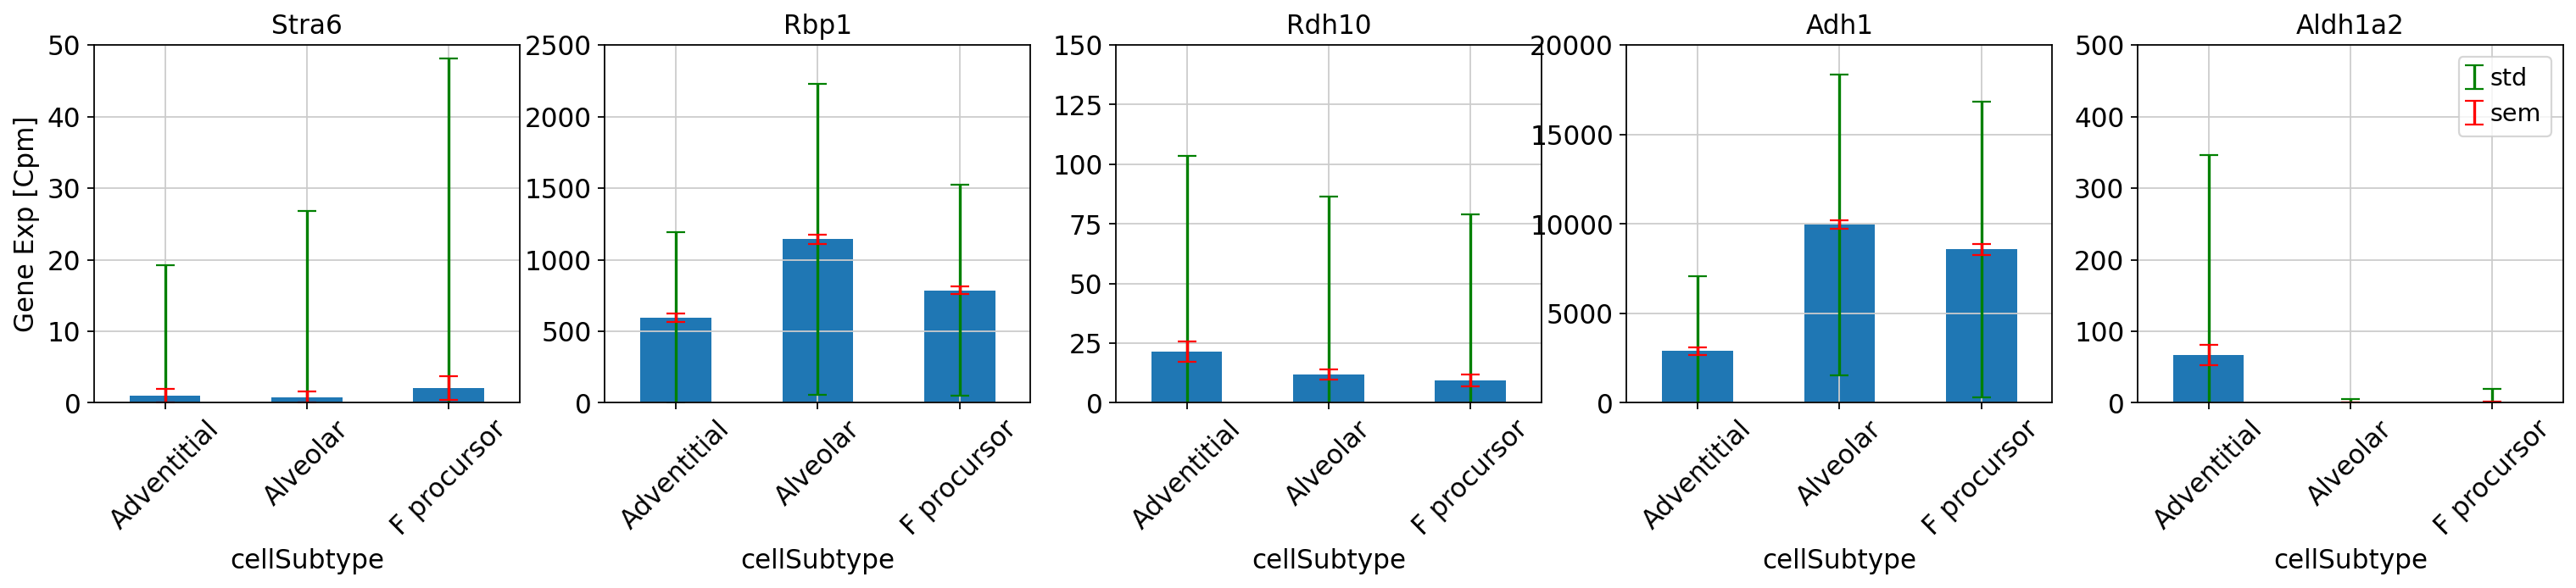

In [126]:
fig,axs=plt.subplots(1,5,figsize=(20,4))
ax=axs[0]
dataplot_Stra6.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Stra6
std_Stra6=gbi.std()['Stra6']
sem_Stra6=gbi.std()['Stra6']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Stra6,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Stra6,color='red',ls='',capsize=5,label='sem')
ax.set_ylabel('Gene Exp [Cpm]')
ax.set_title('Stra6')
ax.set_ylim(0,50)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

ax=axs[1]
dataplot_Rbp1.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Rbp1
std_Rbp1=gbi.std()['Rbp1']
sem_Rbp1=gbi.std()['Rbp1']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Rbp1,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Rbp1,color='red',ls='',capsize=5,label='sem')
ax.set_title('Rbp1')
ax.set_ylim(0,2500)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

ax=axs[2]
dataplot_Rdh10.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Rdh10
std_Rdh10=gbi.std()['Rdh10']
sem_Rdh10=gbi.std()['Rdh10']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Rdh10,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Rdh10,color='red',ls='',capsize=5,label='sem')
ax.set_title('Rdh10')
ax.set_ylim(0,150)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

ax=axs[3]
dataplot_Adh1.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Adh1
std_Adh1=gbi.std()['Adh1']
sem_Adh1=gbi.std()['Adh1']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Adh1,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Adh1,color='red',ls='',capsize=5,label='sem')
ax.set_title('Adh1')
ax.set_ylim(0,20000)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

ax=axs[4]
dataplot_Aldh1a2.plot.bar(ax=ax,label='_nolegend_')
x=[0,1,2]
y=dataplot_Aldh1a2
std_Aldh1a2=gbi.std()['Aldh1a2']
sem_Aldh1a2=gbi.std()['Aldh1a2']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Aldh1a2,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Aldh1a2,color='red',ls='',capsize=5,label='sem')
ax.set_title('Aldh1a2')
ax.set_ylim(0,500)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)
ax.legend(['std','sem'],loc='upper right')
plt.subplots_adjust(left=0.05,bottom=0.25)
plt.savefig('figures/tsnefigures/report/RA_genes_cpm.png')

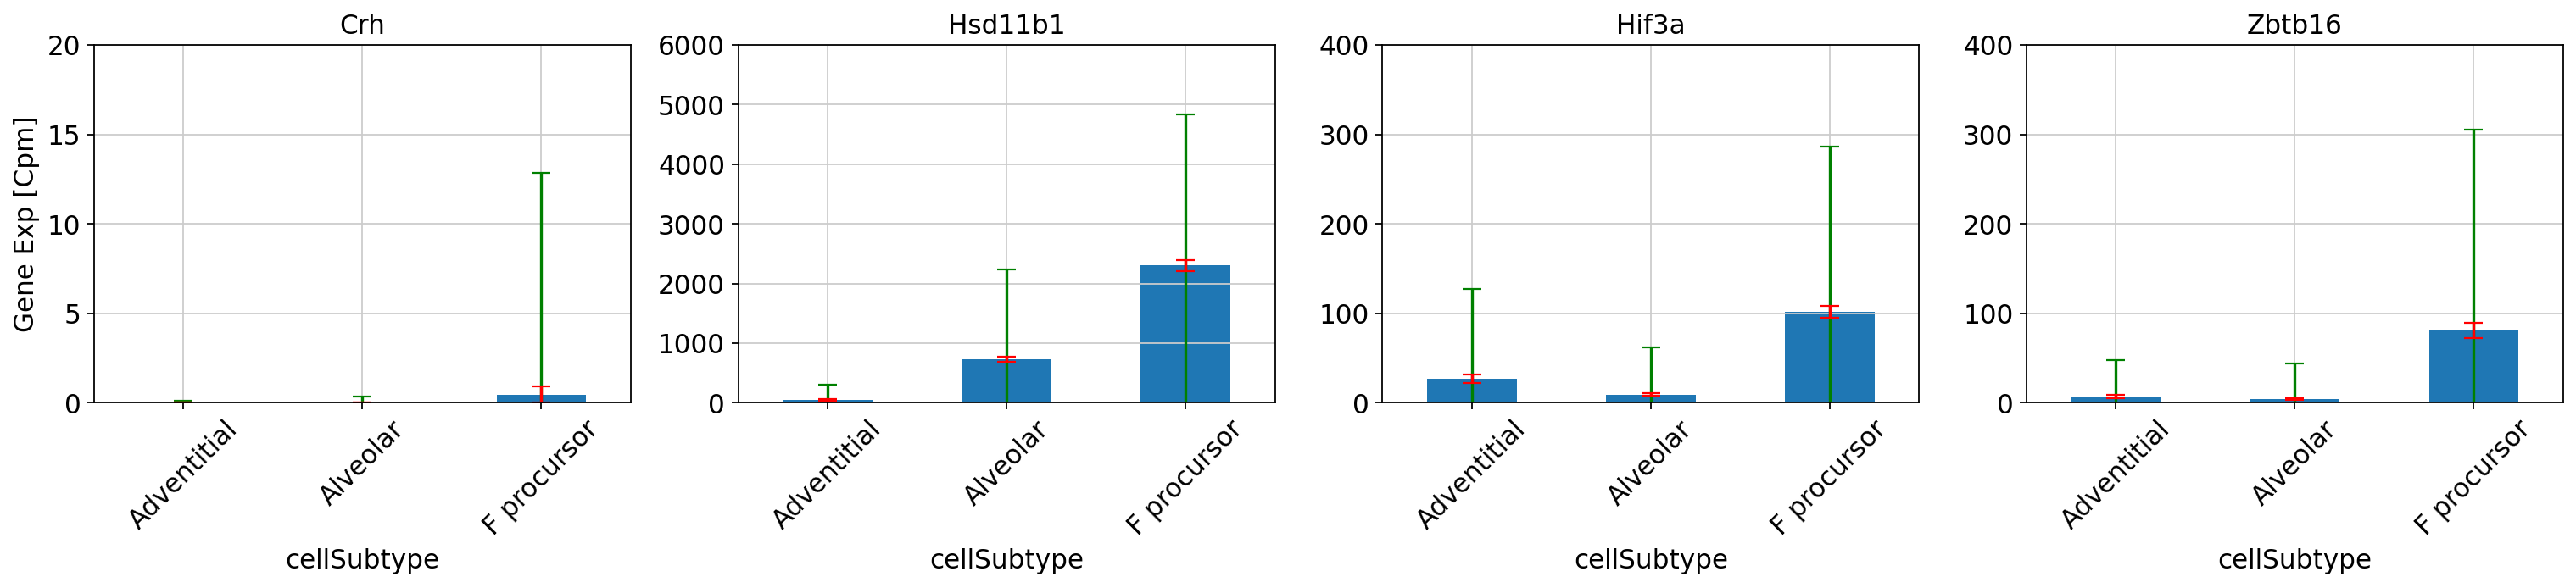

In [135]:
fig,axs=plt.subplots(1,4,figsize=(20,4))
ax=axs[0]
dataplot_Crh.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Crh
std_Crh=gbi.std()['Crh']
sem_Crh=gbi.std()['Crh']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Crh,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Crh,color='red',ls='',capsize=5,label='sem')
ax.set_ylabel('Gene Exp [Cpm]')
ax.set_title('Crh')
ax.set_ylim(0,20)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

ax=axs[1]
dataplot_Hsd11b1.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Hsd11b1
std_Hsd11b1=gbi.std()['Hsd11b1']
sem_Hsd11b1=gbi.std()['Hsd11b1']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Hsd11b1,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Hsd11b1,color='red',ls='',capsize=5,label='sem')
ax.set_title('Hsd11b1')
ax.set_ylim(0,6000)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

ax=axs[2]
dataplot_Hif3a.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Hif3a
std_Hif3a=gbi.std()['Hif3a']
sem_Hif3a=gbi.std()['Hif3a']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Hif3a,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Hif3a,color='red',ls='',capsize=5,label='sem')
ax.set_title('Hif3a')
ax.set_ylim(0,400)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

ax=axs[3]
dataplot_Zbtb16.plot.bar(ax=ax)
x=[0,1,2]
y=dataplot_Zbtb16
std_Zbtb16=gbi.std()['Zbtb16']
sem_Zbtb16=gbi.std()['Zbtb16']/np.sqrt(gbi.size())
ax.errorbar(x,y,yerr=std_Zbtb16,color='green',ls='',capsize=5,label='std')
ax.errorbar(x,y,yerr=sem_Zbtb16,color='red',ls='',capsize=5,label='sem')
ax.set_title('Zbtb16')
ax.set_ylim(0,400)
ax.set_xticklabels(['Adventitial','Alveolar','F procursor'],rotation=45)

plt.subplots_adjust(left=0.05,bottom=0.25)
plt.savefig('figures/tsnefigures/report/GC_genes_cpm.png')